In [5]:
import pandas as pd
df = pd.read_csv('Crop_recommendation.csv')

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
print(df.isnull().sum())  # Check for missing values
print(df.describe())      # Summary statistics to spot outliers

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.97

In [8]:
X = df.drop('label', axis=1)  # Features: N, P, K, temperature, humidity, ph, rainfall
y = df['label']               # Target: crop label


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed metrics (precision, recall, F1-score) per crop
report = classification_report(y_test, y_pred, output_dict=True)
overall_metrics = report['weighted avg']
print(f"Precision: {overall_metrics['precision']:.2f}")
print(f"Recall: {overall_metrics['recall']:.2f}")
print(f"F1-score: {overall_metrics['f1-score']:.2f}")
print(f"Support: {overall_metrics['support']}")

Accuracy: 0.9932
Precision: 0.99
Recall: 0.99
F1-score: 0.99
Support: 440.0


In [13]:
new_data = [[90, 42, 43, 20.88, 82.00, 6.50, 202.94]]
new_data_scaled = scaler.transform(new_data)
predicted_crop = clf.predict(new_data_scaled)
print(f"Recommended crop: {predicted_crop[0]}")

Recommended crop: rice


c:\Users\amand\Desktop\crop_prediction_ML\myvenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
probas = clf.predict_proba(new_data_scaled)[0]
top_n = 3
top_indices = probas.argsort()[-top_n:][::-1]
top_crops = clf.classes_[top_indices]
top_probs = probas[top_indices]
for crop, prob in zip(top_crops, top_probs):
    print(f"Crop: {crop}, Probability: {prob:.2f}")

Crop: rice, Probability: 0.99
Crop: jute, Probability: 0.01
Crop: pomegranate, Probability: 0.00


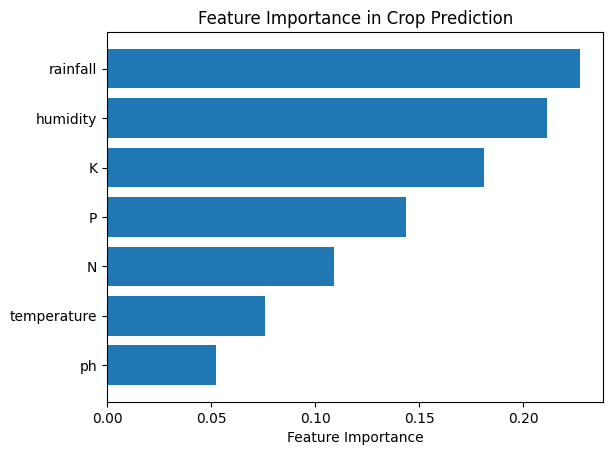

In [15]:
import matplotlib.pyplot as plt
importances = clf.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Crop Prediction')
plt.show()

In [16]:
# Assuming clf, X_train_scaled, X_test_scaled, y_train, y_test are from your setup
train_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9932


In [17]:
# Define your custom input as a list
custom_input = [[90, 42, 43, 20.88, 82.00, 6.50, 202.94]]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
# Scale the custom input
custom_input_scaled = scaler.transform(custom_input)

c:\Users\amand\Desktop\crop_prediction_ML\myvenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
# Assuming clf is your trained RandomForestClassifier
predicted_crop = clf.predict(custom_input_scaled)
print(f"Recommended crop: {predicted_crop[0]}")

Recommended crop: rice


In [21]:
# Get probabilities
probas = clf.predict_proba(custom_input_scaled)[0]

# Get top 3 predictions
top_n = 3
top_indices = probas.argsort()[-top_n:][::-1]  # Sort in descending order
top_crops = clf.classes_[top_indices]           # Crop names
top_probs = probas[top_indices]                 # Corresponding probabilities

# Display results
for crop, prob in zip(top_crops, top_probs):
    print(f"Crop: {crop}, Probability: {prob:.2f}")

Crop: rice, Probability: 0.99
Crop: jute, Probability: 0.01
Crop: pomegranate, Probability: 0.00


In [22]:
import joblib

# Save the trained RandomForestClassifier
joblib.dump(clf, 'crop_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']